In [22]:
import os
import pandas as pd

dataset_path = "C:/Users/prabh/Desktop/PJ3"

# Initialize empty lists to store data and labels
data = []
labels = []

# Iterate through each folder (Z, O, N, F, S)
for folder_name in ["Z", "O", "N", "F", "S"]:
    folder_path = os.path.join(dataset_path, folder_name)
    
    # Iterate through each file in the folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        
        # Read EEG data from the text file
        with open(file_path, 'r') as file:
            eeg_data = file.read().splitlines()
        
        # Append the EEG data to the 'data' list
        data.append(eeg_data)
        
        # Append the label (folder_name) to the 'labels' list
        labels.append(folder_name)

# Create a DataFrame from the lists
df = pd.DataFrame({'Data': data, 'Label': labels})

# Display the DataFrame
print(df.head())

                                                Data Label
0  [12, 22, 35, 45, 69, 74, 79, 78, 66, 43, 33, 3...     Z
1  [-56, -50, -64, -91, -135, -140, -134, -114, -...     Z
2  [-37, -22, -17, -24, -31, -20, -5, 14, 31, 31,...     Z
3  [-31, -43, -39, -39, -9, -5, 18, 7, -12, -42, ...     Z
4  [14, 26, 32, 25, 16, 8, 8, 12, 11, 19, 23, 24,...     Z


In [23]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Convert labels to numerical values using LabelEncoder
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])

# Pad sequences to ensure uniform length
max_sequence_length = max(len(seq) for seq in df['Data'])
padded_sequences = pad_sequences(df['Data'], maxlen=max_sequence_length, padding='post', dtype='float32')

# Standardize the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(np.array(padded_sequences).reshape(-1, max_sequence_length))

Data Splitting

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, df['Label'], test_size=0.2, random_state=42)

# Display the processed data
print("Processed EEG Data:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Processed EEG Data:
X_train shape: (400, 4097)
X_test shape: (100, 4097)
y_train shape: (400,)
y_test shape: (100,)


Model Training:

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Build a simple CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(max_sequence_length, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))  # Adjust the output layer based on the number of classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
13/13 [==============================] - 2s 110ms/step - loss: 2.0281 - accuracy: 0.2725 - val_loss: 1.3086 - val_accuracy: 0.4500
Epoch 2/10
13/13 [==============================] - 1s 90ms/step - loss: 1.1714 - accuracy: 0.5000 - val_loss: 1.2580 - val_accuracy: 0.3700
Epoch 3/10
13/13 [==============================] - 1s 92ms/step - loss: 1.0284 - accuracy: 0.6800 - val_loss: 1.1875 - val_accuracy: 0.5600
Epoch 4/10
13/13 [==============================] - 1s 90ms/step - loss: 0.8145 - accuracy: 0.7500 - val_loss: 1.0161 - val_accuracy: 0.5800
Epoch 5/10
13/13 [==============================] - 1s 90ms/step - loss: 0.5980 - accuracy: 0.8325 - val_loss: 0.9398 - val_accuracy: 0.6000
Epoch 6/10
13/13 [==============================] - 1s 95ms/step - loss: 0.4071 - accuracy: 0.9200 - val_loss: 0.8382 - val_accuracy: 0.7000
Epoch 7/10
13/13 [==============================] - 1s 90ms/step - loss: 0.2641 - accuracy: 0.9700 - val_loss: 0.7908 - val_accuracy: 0.6600
Epoch 8/10
1

Model Evaluation:

In [26]:
accuracy = model.evaluate(X_test, y_test)[1]
print("Test Accuracy:", accuracy)

4/4 [==============================] - 0s 16ms/step - loss: 0.8008 - accuracy: 0.7100
Test Accuracy: 0.7099999785423279


Testing:

In [27]:
# Assuming the model is already trained

# Make predictions on the test set
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Display the predicted labels and true labels
df_results = pd.DataFrame({'True Labels': y_test, 'Predicted Labels': predicted_labels})
print(df_results.head())


4/4 [==============================] - 0s 15ms/step
     True Labels  Predicted Labels
361            0                 0
73             4                 4
374            0                 0
155            2                 2
104            2                 2


Results and Visualization:

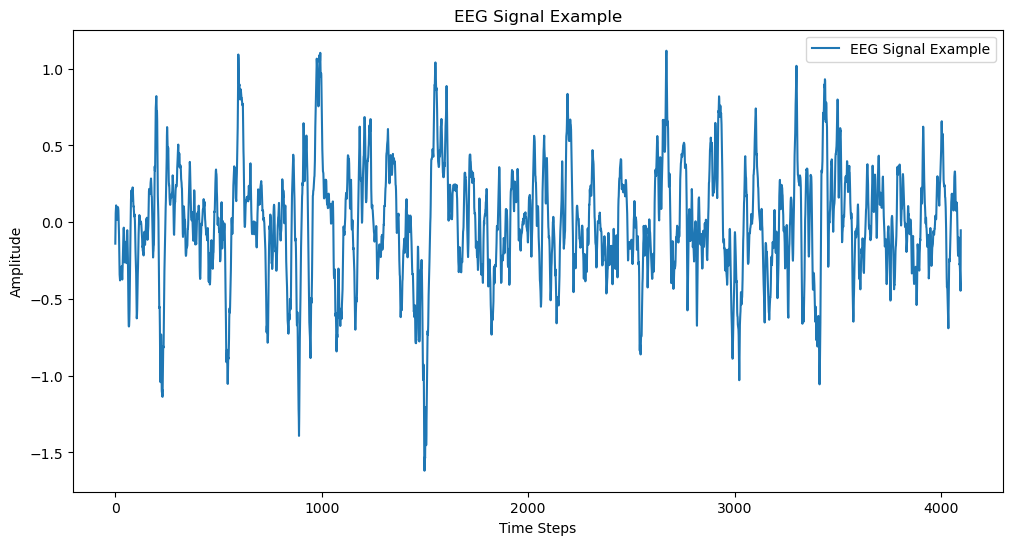

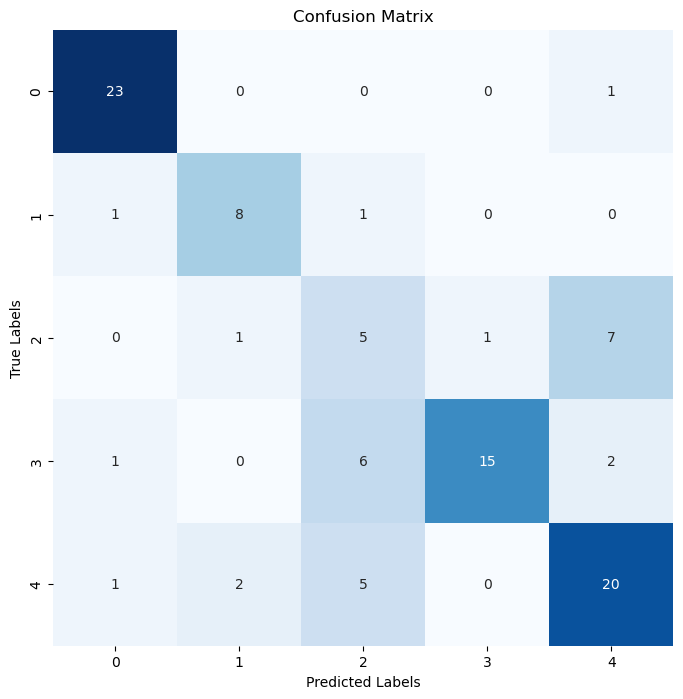

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        24
           1       0.73      0.80      0.76        10
           2       0.29      0.36      0.32        14
           3       0.94      0.62      0.75        24
           4       0.67      0.71      0.69        28

    accuracy                           0.71       100
   macro avg       0.70      0.69      0.69       100
weighted avg       0.74      0.71      0.72       100



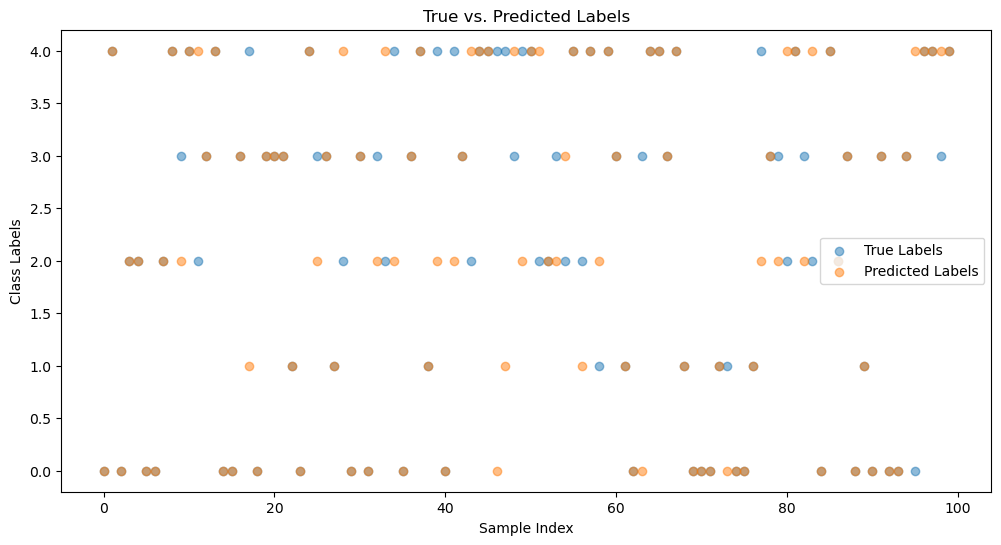

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Visualize EEG data
plt.figure(figsize=(12, 6))
plt.plot(X_test[0].flatten(), label='EEG Signal Example')
plt.title('EEG Signal Example')
plt.xlabel('Time Steps')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Visualize confusion matrix
cm = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Visualize classification report
print("Classification Report:")
print(classification_report(y_test, predicted_labels))

# Visualize model predictions vs. true labels
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, label='True Labels', alpha=0.5)
plt.scatter(range(len(predicted_labels)), predicted_labels, label='Predicted Labels', alpha=0.5)
plt.title('True vs. Predicted Labels')
plt.xlabel('Sample Index')
plt.ylabel('Class Labels')
plt.legend()
plt.show()
